# Logistic Regression

- The scikit-learn library digits dataset
- The MNIST datasetof hand wrtten digits

Linear Regression
- http://www.scipy-lectures.org

Scikit-learn requires:
- Python 3
- NumPy
- SciPy

The easiest way to install scikit-learn is to use pip or or conda:
- pip install -U scikit-learn
- conda install scikit-learn

## Logistic Regression: The scikit-learn library digits dataset

The scikit-learn library Digits dataset provides a small sample of hand wrtten digits. The scikit-learn library Digits dataset contains a total of 1797 samples 8x8 pixel images.

See: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_toy_digits.ipynb

## Load and display the scikit-learn library Digits Dataset

(1797, 64)


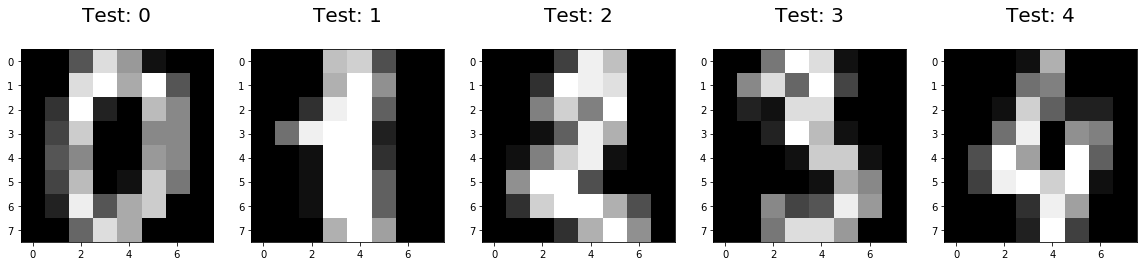

In [1]:
%matplotlib inline

# load and display first 5 digit images
from sklearn.datasets import load_digits
import numpy as np 
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.figure(figsize=(20,4))
for index in range(0, 5):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(digits.images[index], (8,8)), cmap=plt.cm.gray)
    plt.title('Test: %i\n' % index, fontsize = 20)

## Digits Dataset: Load and Split

In [5]:
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 

import matplotlib.pyplot as plt

# test_size: proportion of original data used for test set
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


## Scikit-learn: Fit LogisticRegression Model on Training data

In [6]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predict Labels of New Testing Data

[  0.   0.  11.  16.  15.   3.   0.   0.   0.   5.  16.  12.  11.  13.   0.
   0.   0.   3.  13.   1.   5.  15.   0.   0.   0.   0.   0.   0.  12.  11.
   0.   0.   0.   0.   0.   1.  16.   7.   0.   0.   0.   0.   0.  10.  15.
   0.   0.   0.   0.   0.  12.  16.  16.  11.   1.   0.   0.   0.  13.  13.
   8.  13.  16.   8.]
[2]
[  0.   1.  15.  14.   2.   0.   0.   0.   0.   6.  14.   0.   0.   3.   2.
   0.   0.   2.  16.   3.   2.  13.   3.   0.   0.   0.  11.  14.  15.   9.
   0.   0.   0.   0.   7.  16.  11.   0.   0.   0.   0.   0.  15.  13.  14.
   0.   0.   0.   0.   2.  15.   4.  16.   3.   0.   0.   0.   1.  15.  16.
  12.   1.   0.   0.]
[8]
[  0.   2.  13.  16.  10.   0.   0.   0.   0.  12.  15.   9.  16.   2.   0.
   0.   0.  10.   8.   1.  16.   6.   0.   0.   0.   1.   1.   2.  16.   6.
   0.   0.   0.   0.   0.  10.  15.   2.   0.   0.   0.   0.   2.  15.   9.
   0.   0.   0.   0.   2.  15.  16.   9.   8.   6.   0.   0.   1.  13.  16.
  16.  16.  16.   3.]
[2]
[  0.   0.

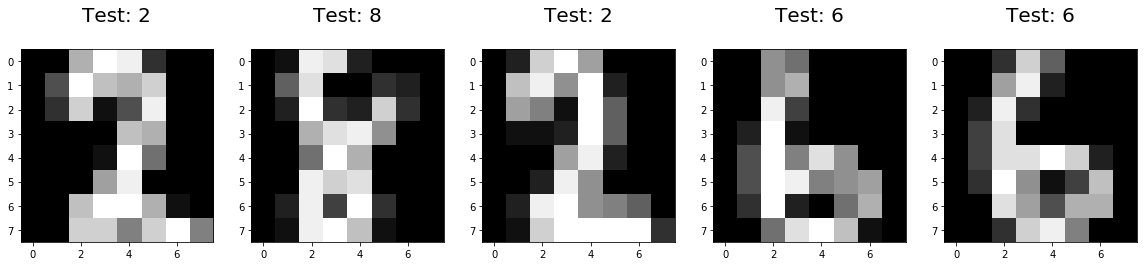

In [10]:
plt.gray()
plt.figure(figsize=(20,4))
for index in range(0, 5):
    print(x_test[index])
    pred = logisticRegr.predict(x_test[index].reshape(1,-1))
    print(pred)
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(x_test[index], (8,8)))
    plt.title('Test: %i\n' % pred, fontsize = 20)

## Score Model Performance

In [11]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.953333333333


## Confusion Matrix

In [11]:
# Used for Confusion Matrix
from sklearn import metrics

# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

confusion = metrics.confusion_matrix(y_test, predictions)
print('Confusion Matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

NameError: name 'x_test' is not defined

## Display Misclassified Images

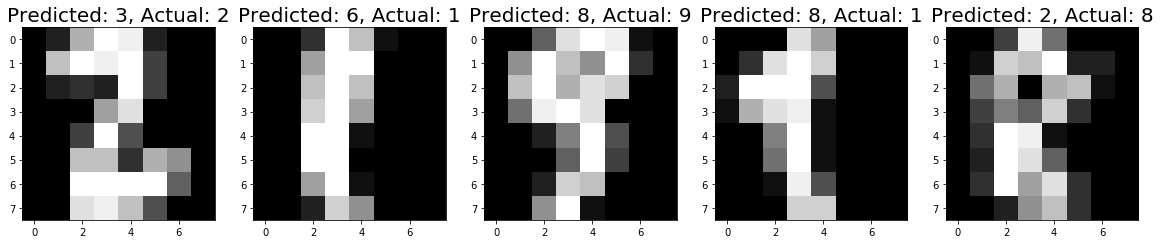

In [19]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)


## The MNIST datasetof hand wrtten digits

The MNIST dataset contains 60,000 training images and 10,000 testing images that are 28x28 pixels.

The MNIST database of handwritten digits is available on the following website: [MNIST Dataset](http://yann.lecun.com/exdb/mnist)

Four Files:

- train-images-idx3-ubyte.gz: training set images (9912422 bytes) 
- train-labels-idx1-ubyte.gz: training set labels (28881 bytes) 
- t10k-images-idx3-ubyte.gz: test set images (1648877 bytes) 
- t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

See: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_MNIST.ipynb

In [ ]:
## Loading MNIST Dataset

In [3]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics

# Used for Loading MNIST
from struct import unpack

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

train_img, train_lbl = loadmnist('data/mnist/train-images.idx3-ubyte', 'data/mnist/train-labels.idx1-ubyte')
test_img, test_lbl = loadmnist('data/mnist/t10k-images.idx3-ubyte', 'data/mnist/t10k-labels.idx1-ubyte')

print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Display Training Digits and Labels

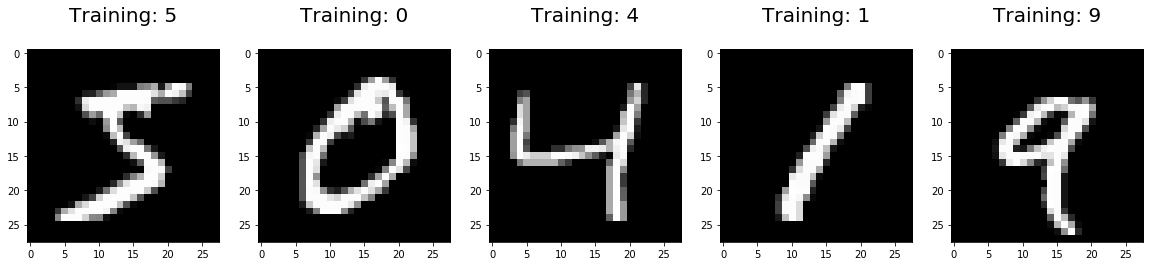

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
print(train_img[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## Fit Logistic Regression on Entire Dataset

In [6]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

## Predict

In [7]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

## Score Model Performance

In [8]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9173


## Confusion Matrix

Confusion Matrix
[[ 958    0    0    4    0    3    5    2    6    2]
 [   0 1116    3    1    0    1    4    1    8    1]
 [   8   12  906   18    9    5   10   11   50    3]
 [   3    0   19  916    2   23    5   11   24    7]
 [   1    2    5    3  910    0   11    2   10   38]
 [  11    2    1   40   10  754   16    8   39   11]
 [   7    3    7    2    4   17  909    1    8    0]
 [   3    6   24    4    7    1    1  946    5   31]
 [   9   15    7   22   11   26    7   12  854   11]
 [   9    6    2   13   30    4    0   25   16  904]]


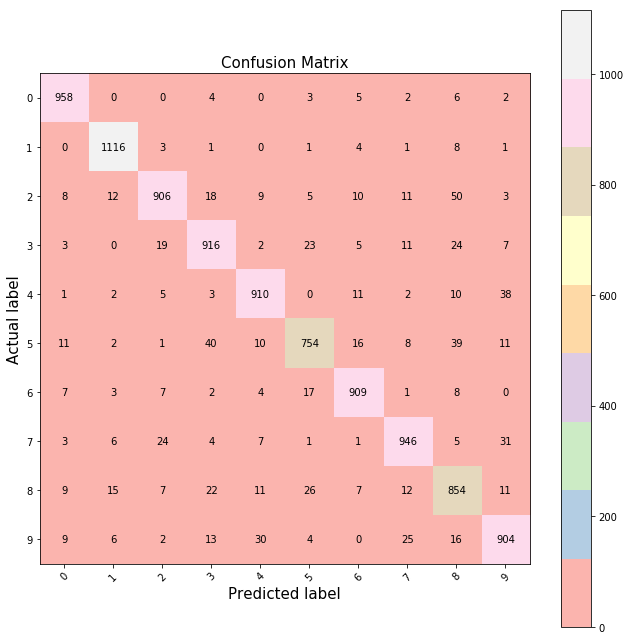

In [12]:
# Used for Confusion Matrix
from sklearn import metrics

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
            
# Make predictions on test data
predictions = logisticRegr.predict(test_img)

confusion = metrics.confusion_matrix(test_lbl, predictions)
print('Confusion Matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

## Display Misclassified images

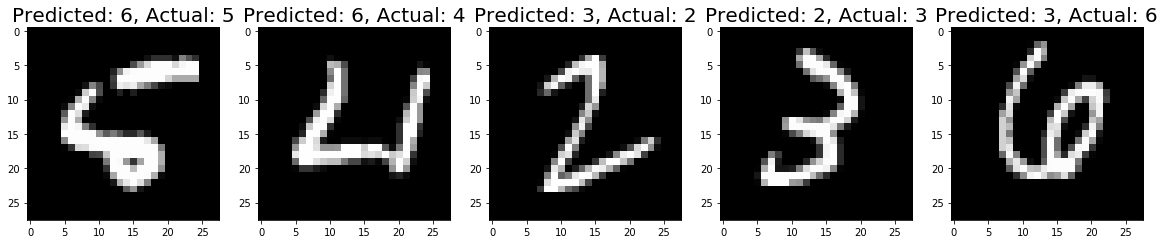

In [13]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 20)
